In [1]:
import torch
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from Net import Net
from CustomImageDataset import CustomImageDataset

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Resize the images to (224, 224)
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

In [3]:
batch_size = 4

test_dataset = CustomImageDataset("./test_labels.csv", "./img_test", transform=transform)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    # transformToPIL(img).show()
    plt.imshow(np.transpose(np.array(img), (1, 2, 0)))
    plt.show()

In [5]:
classes = ('apple', 'banana', 'orange')

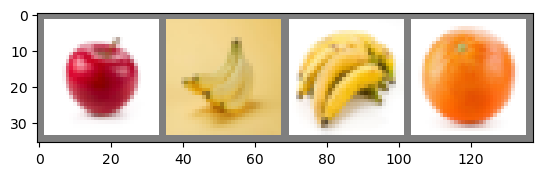

GroundTruth:  apple banana banana orange


In [6]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [7]:
net = Net()

In [8]:
net.load_state_dict(torch.load("./fruit_identification_model.pth"))

<All keys matched successfully>

torch.Size([4, 3])


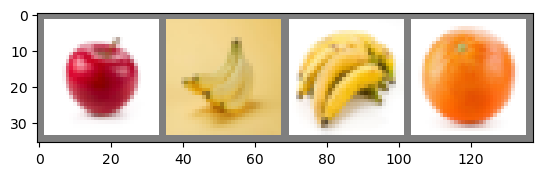

tensor([1, 1, 1, 1])


In [9]:
net.eval()

outputs = net(images)

print(outputs.shape)

_, predictions = torch.max(outputs.data, 1)

imshow(torchvision.utils.make_grid(images))

print(predictions)

Predicted class index for image 1: 1
Predicted class index for image 2: 1
Predicted class index for image 3: 1
Predicted class index for image 4: 1


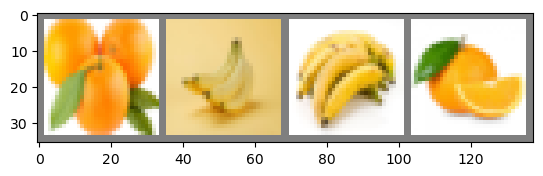

GroundTruth:  orange banana banana orange
Predicted:  banana banana banana banana
Predicted class index for image 1: 1
Predicted class index for image 2: 1
Predicted class index for image 3: 1
Predicted class index for image 4: 1
Accuracy of the network on the 8 test images: 37.50%


In [10]:
net.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print raw output tensor and predicted class index for each image
        for i in range(batch_size):
            print(f"Predicted class index for image {i+1}: {predicted[i].item()}")

        # Print predicted and ground truth labels for the first batch
        if total <= batch_size:
            imshow(torchvision.utils.make_grid(images))
            print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(labels.size(0))))
            print('Predicted: ', ' '.join(f'{classes[predicted[j].item()]:5s}' for j in range(predicted.size(0))))

print(f'Accuracy of the network on the {len(test_dataset)} test images: {100 * correct / total:.2f}%')